# Vector Embedding

## Vectors

A vector is a mathematical object that has both magnitude and direction. It is often represented as an arrow in a coordinate system, where the length of the arrow represents the magnitude and the direction of the arrow represents the direction.

$$
\vec{v} = \begin{pmatrix} 3 \\ 4 \end{pmatrix}
$$

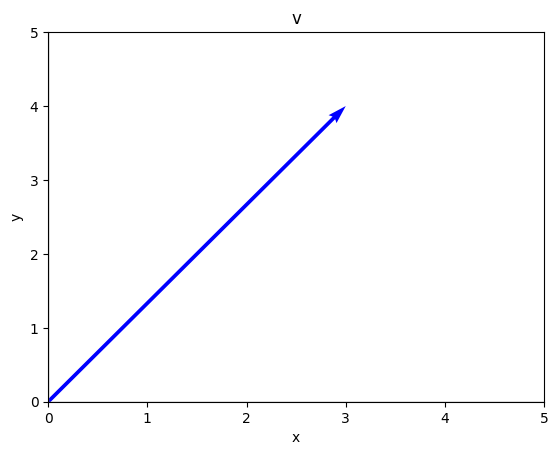

In [1]:
from my_functions import draw_vectors

draw_vectors([[3, 4, "b"]], [0, 5], [0, 5], "v")

### Vector Norm (Magnitude|Length)

The norm of a vector is a measure of the length of the vector. It is calculated as the square root of the sum of the squares of the vector elements.

$$
\| \vec{v} \| = \sqrt{3^2 + 4^2}=5

### Vector Normalization

Normalization is the process of scaling individual samples to have unit norm. In case of vectors, it is the process of scaling a vector to have a length of 1. It is done by dividing the vector by its norm. The normalized vector is also called a unit vector written as $\vec{v_0}$.

$$
\vec{v_0} = \frac{\vec{v}}{\| \vec{v} \|} = \frac{\begin{pmatrix} 3 \\ 4 \end{pmatrix}}{5} = \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix}
$$

$$
\| \vec{v_0} \| = \sqrt{0.6^2 + 0.8^2} = 1
$$

The direction of the vector keeps the same after normalization.

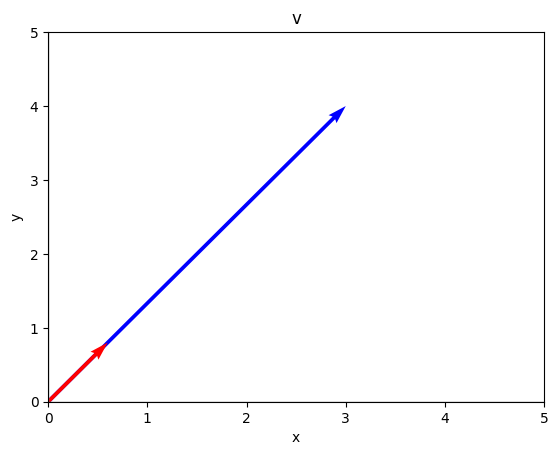

In [2]:
draw_vectors([[3, 4, "b"], [0.6, 0.8, "r"]], [0, 5], [0, 5], "v")

### Vector Multiplication (Dot Product)

The dot product of two vectors is a scalar quantity that is calculated as the sum of the products of the corresponding elements of the two vectors. It is also called the inner product. The dot product has a result of zero if the two vectors are orthogonal (perpendicular) to each other.

$$
\vec{v} \cdot \vec{w} = \begin{pmatrix} 3 \\ 4 \end{pmatrix} \cdot \begin{pmatrix} -4 \\ 3 \end{pmatrix} = 3 \cdot (-4) + 4 \cdot 3 = 0
$$

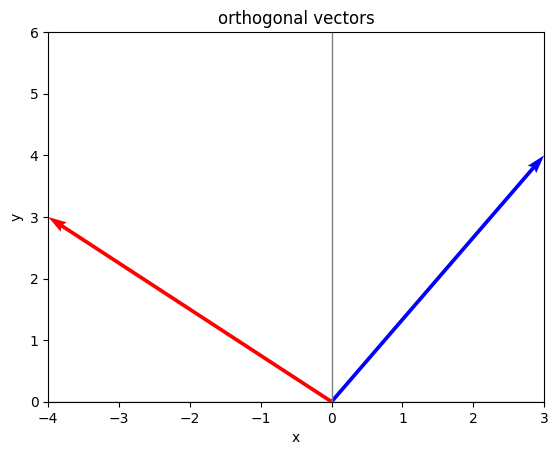

In [3]:
draw_vectors([[3, 4, "b"], [-4, 3, "r"]], [-4, 3], [0, 6], "orthogonal vectors")

### Angle Between Vectors

The angle is independent of the magnitude of the vectors and is calculated as the inverse cosine of the dot product of the vectors divided by the product of the magnitudes of the vectors.

![Angle Between Vectors](img/angle.png)

$$
\cos(\phi) = \frac{\vec{v} \cdot \vec{w}}{\| \vec{v} \| \cdot \| \vec{w} \|} = \text{cosine similarity}
$$

So if the magnitudes of the vectors are 1, the cosine similarity is the same as the dot product because the division by 1 does not change the value!

$$
\cos(\phi) = \vec{v_0} \cdot \vec{w_0} = \text{cosine similarity}
$$

#### Cosine Similarity

The cosine similarity has a range of [-1,1].

| Cosine Similarity | Angle |
| --- | --- |
| 1 | 0° |
| 0 | 90° |
| -1 | 180° |



### More Dimensions

*Above you have seen nicely drawn 2D vectors. It is possible to draw 3D vectors as well, but it is not possible to draw 4D vectors and higher. But the math works the same way. The dot product and the angle between vectors are calculated the same way.*

## Embeddings

An embedding model takes data like texts, images, or audio and converts it into a vector space. The vector space is a multi-dimensional space where each dimension represents a feature of the data. The embedding model learns to map the data into the vector space in such a way that similar data points are close to each other in the vector space.

![Embedding](img/embedding.png)

Source: https://jkfran.com/introduction-vector-embedding-databases.md

Embeddings are used in many machine learning tasks, such as natural language processing, computer vision, and recommendation systems. Now it's easier to find similar items, compare items, and make predictions based on the data.

### Text Embeddings using OpenAI's text-embedding-3-large model

The text-embedding-3-large model is a transformer-based model that takes text as input and outputs a vector representation of the text. The model is trained on a large corpus of text data and learns to map the text into a vector space in such a way that similar texts are close to each other in the vector space.

Each vector has **3072 dimensions**.

In [4]:
import numpy as np
from openai import OpenAI
import pandas as pd

# Import OpenAI key

with open("key", "r") as f:
    key = f.read().strip()

# Create OpenAI client
client = OpenAI(
    api_key=key,
)


# Define a helper function to calculate embeddings
def get_embedding_vec(input):
    """Returns the embeddings vector for a given input"""
    return (
        client.embeddings.create(
            input=input,
            model="text-embedding-3-large",  # We use the new embeddings model here (announced end of Jan 2024)
            # dimensions=500  You can limit the number of output dimensions with the new embeddings models
        )
        .data[0]
        .embedding
    )

### Basic example

In [5]:
words = ["dog", "cat", "animal", "house", "castle", "ship", "boat"]
embeddings = [get_embedding_vec(word) for word in words]

**Information about an embedding**

In [6]:
# Embedding of word "dog"

print("Embedding:", embeddings[0])
print("Dimensions:", len(embeddings[0]))
print("Norm:", np.linalg.norm(embeddings[0]))

Embedding: [-0.03948046267032623, 0.002456025220453739, 0.004106796346604824, 0.0014178225537762046, 0.025476709008216858, 0.018881293013691902, -0.003568043000996113, 0.007446683943271637, -7.315590482903644e-05, 0.057364773005247116, -0.011143184266984463, -0.02197960391640663, -0.0004119738005101681, -0.052947379648685455, -0.04760969430208206, -0.0067334589548408985, -0.05021718516945839, 0.004950395785272121, -0.005318512208759785, -0.032118137925863266, -0.004647466819733381, 4.310865915613249e-05, 0.017868973314762115, 0.006407522596418858, 0.0057786572724580765, 0.019985642284154892, -0.011028148233890533, 0.02767006680369377, -0.008060211315751076, 0.010844090022146702, 0.017761606723070145, 0.037639882415533066, -0.00039855288923718035, 0.024648446589708328, -0.01717875525355339, 0.004260178189724684, 0.03159664198756218, -0.014801339246332645, -0.0037329283077269793, -0.00555241946130991, -0.014256834052503109, -0.013045118190348148, -0.040584810078144073, -0.013766012154519

As you can see in the example below, the embedding is a list of 3072 float numbers. The model gives us vectors with a norm of nearly 1. The vectors are already normalized and the dot product can be used to calculate the cosine similarity.

Now lets compare "dog" and "boat" with the other words.

In [7]:
comparisons = {"word": [], "Cosine similarity": []}

for i in range(0, len(words)):
    word = words[i]
    embedding = embeddings[i]
    similarity = np.dot(embeddings[0], embedding)  # Cosine similarity
    comparisons["word"].append(word)
    comparisons["Cosine similarity"].append(similarity)

print("Dog")
pd.DataFrame(comparisons).sort_values("Cosine similarity", ascending=False)

Dog


,word,Cosine similarity
0,dog,1.000000
2,animal,0.593001
1,cat,0.590689
6,boat,0.494281
3,house,0.371027
5,ship,0.344820
4,castle,0.302809


In [8]:
comparisons = {"word": [], "Cosine similarity": []}

for i in range(0, len(words)):
    word = words[i]
    embedding = embeddings[i]
    similarity = np.dot(embeddings[len(words) - 1], embedding)  # Cosine similarity
    comparisons["word"].append(word)
    comparisons["Cosine similarity"].append(similarity)

print("Boat")
pd.DataFrame(comparisons).sort_values("Cosine similarity", ascending=False)

Boat


,word,Cosine similarity
6,boat,1.000000
5,ship,0.710627
0,dog,0.494281
4,castle,0.454605
1,cat,0.409296
2,animal,0.409088
3,house,0.402153


### More Examples

Here the strength of the embedding model becomes clear.

In [9]:
def compare(s):
    sim1 = np.dot(get_embedding_vec(s[0]), get_embedding_vec(s[1]))
    sim2 = np.dot(get_embedding_vec(s[0]), get_embedding_vec(s[2]))
    return (sim1, sim2)


sentences = [
    # Although sentences 1 and 2 use different words (soccer, football),
    # the cosine similarity of 1 and 2 is higher compared to 1 and 3 because
    # the meaning of 1 and 2 is more similar.
    [
        "I enjoy playing soccer on weekends.",
        "Football is my favorite sport. Playing it on weekends with friends helps me to relax.",
        "In Austria, people often watch soccer on TV on weekends.",
    ],
    # Here we test whether the OpenAI embedding model "understands", that the
    # contextual meaning of "Java" is different in sentences 1 and 2. Therefore,
    # the cosine similarity of 1 and 3 is higher as both are programming-related.
    [
        "He is interested in Java programming.",
        "He visited Java last summer.",
        "He recently started learning Python programming.",
    ],
    # The next example deals with negation handling. All three sentences are
    # about whether someone likes going to the gym. Sentences 1 and 3 are positive
    # (i.e. like training in the gym), while 2 is not. Therefore, 1 and 3 have
    # a higher cosine similarity.
    [
        "I like going to the gym.",
        "I don't like going to the gym.",
        "I don't dislike going to the gym.",
    ],
    # Let's take a look at ideomatic expressions. Sentences 1 and 2 have very
    # similar meaning. 3 also contains "cats and dogs", but the meaning is different.
    # As a result, cosine similarity between 1 and 2 is higher.
    [
        "It's raining cats and dogs.",
        "The weather is very bad, it's pouring outside.",
        "Cats and dogs don't go outside when it rains.",
    ],
    # The last example demonstrates the limits of embeddings. Berry Harris is
    # a well-known teacher in Jazz. Using "the 6th on the 5th" is typical for him.
    # One must know Berry Harris and the musical theory that he has tought to
    # understand the similarity of the sentences 1 and 2. OpenAI embeddings
    # do not understand that.
    [
        "I like how Barry Harris described Jazz theory.",
        "Playing the 6th on the 5th is an important concept that you must understand.",
        "My friends Barry and Harris often visit me to play computer games.",
    ],
]
print(f"Semantic similarity: {compare(sentences[0])}")
print(f"Contextual meaning: {compare(sentences[1])}")
print(f"Negation handling: {compare(sentences[2])}")
print(f"Idiomatic expressions: {compare(sentences[3])}")
print(f"Knowledge: {compare(sentences[4])}")

Semantic similarity: (0.7499036522326152, 0.5067070867769725)
Contextual meaning: (0.5354304210359135, 0.5869838953252683)
Negation handling: (0.7138645395151711, 0.7731087559905554)
Idiomatic expressions: (0.6408986828273315, 0.520895247968224)
Knowledge: (0.25551985268957955, 0.27449200301840426)


### My trip advisor

I will use the text-embedding-3-large model to create a trip advisor. The user can input a text and the model will find the most similar destinations in the database. The database contains 9 different locations with a description. The model will return the most similar locations to the user input.

In [10]:
descriptions = [
    "Maldives, Maldives: A tropical paradise with pristine beaches. Activities: Snorkeling, Scuba diving, Relaxing on the beach.",
    "Paris, France: The City of Love, famous for its iconic landmarks and art. Activities: Eiffel Tower visit, Louvre Museum, Seine River cruise.",
    "Maui, Hawaii: A beautiful island with stunning beaches and lush landscapes. Activities: Surfing, Hiking, Whale watching.",
    "Cancun, Mexico: A popular beach destination with crystal-clear waters. Activities: Swimming, Snorkeling, Exploring Mayan ruins.",
    "Tokyo, Japan: A vibrant metropolis with a mix of modern and traditional attractions. Activities: Shibuya crossing, Tokyo Disneyland, Tsukiji Fish Market.",
    "Banff National Park, Canada: A breathtaking national park with stunning mountain scenery. Activities: Hiking, Wildlife spotting, Canoeing.",
    "Norwegian Fjords, Norway: A picturesque region with majestic fjords and waterfalls. Activities: Fjord cruises, Hiking, Kayaking.",
    "New York City, USA: The Big Apple, known for its skyscrapers, museums, and diverse culture. Activities: Times Square, Central Park, Statue of Liberty visit.",
    "Plitvice Lakes National Park, Croatia: A natural wonderland with cascading lakes and waterfalls. Activities: Walking trails, Boat rides, Wildlife watching.",
]

destinations = []

for description in descriptions:
    parts = description.split(": ")
    destinations.append(
        {
            "Name": parts[0],
            "Description": parts[1],
            "Embedding": get_embedding_vec(parts[1]),
        }
    )

In [11]:
search_values = [
    "My next holidays should be in a sunny place with a nice beach",
    "I want to see beautiful nature",
    "In the next summer I would like to visit a famous city with a lot of culture",
]

number = 2  # 0, 1, 2

search_embedding = get_embedding_vec(search_values[number])

data = {"Name": [], "Similarity": []}
for destination in destinations:
    similarity = np.dot(search_embedding, destination["Embedding"])
    data["Name"].append(destination["Name"])
    data["Similarity"].append(similarity)
print(f"Search: {search_values[number]}")
pd.DataFrame(data).sort_values("Similarity", ascending=False)

Search: In the next summer I would like to visit a famous city with a lot of culture


,Name,Similarity
1,"Paris, France",0.418252
7,"New York City, USA",0.371611
4,"Tokyo, Japan",0.350965
3,"Cancun, Mexico",0.227730
6,"Norwegian Fjords, Norway",0.217218
2,"Maui, Hawaii",0.192666
8,"Plitvice Lakes National Park, Croatia",0.187986
5,"Banff National Park, Canada",0.186218
0,"Maldives, Maldives",0.173200


## Vector Search and the RAG Pattern

Embeddings play a crucial role in _Retrieval-Augmented Generation_ (_RAG_) solutions, an approach in artificial intelligence that combines the capabilities of information retrieval and text generation. In RAG systems, embeddings are used to retrieve relevant information from large datasets or knowledge bases. It is not necessary for these databases to have been included in the original training of the embeddings models. They can be internal data sets that are not publicly accessible on the internet.

In RAG solutions, queries or input texts are transformed into embeddings. Then, the cosine similarity to the document embeddings existing in the database is calculated to identify the most relevant text sections from the database. These retrieved pieces of information are then used by a text generation model like _ChatGPT_ to generate contextually relevant answers or content.

_Vector databases_ play a central role in the functioning of RAG systems. They are designed to efficiently store, index, and query high-dimensional vectors. In the context of RAG solutions and similar systems, vector databases serve as a storage for the embeddings of documents or data pieces that come from a large pool of information. When a user makes a query, this query is first transformed into an embedding vector. The vector database is then used to quickly find the vectors that correspond most closely to this query vector - that is, those documents or pieces of information that show the highest similarity. This process of quickly finding similar vectors in large datasets is known as _Nearest Neighbor Search_.

In [12]:
search_values = [
    "My next holidays should be in a sunny place with a nice beach",
    "I want to see beautiful nature",
    "In the next summer I would like to visit a famous city with a lot of culture",
    "What is the name of Bart Simpsons sister?",
    "What is the best location for hiking?",
]

number = 4  # 0, 1, 2

search_embedding = get_embedding_vec(search_values[number])

data = {"Destination": [], "Similarity": []}
for destination in destinations:
    similarity = np.dot(search_embedding, destination["Embedding"])
    data["Destination"].append(destination["Name"]+": "+destination["Description"])
    data["Similarity"].append(similarity)
print(f"Search: {search_values[number]}")
sorted_result = list(pd.DataFrame(data).sort_values("Similarity", ascending=False).head(3)["Destination"])
sorted_result

Search: What is the best location for hiking?


['Banff National Park, Canada: A breathtaking national park with stunning mountain scenery. Activities',
 'Plitvice Lakes National Park, Croatia: A natural wonderland with cascading lakes and waterfalls. Activities',
 'Norwegian Fjords, Norway: A picturesque region with majestic fjords and waterfalls. Activities']

In [13]:
from string import Template

t = Template("""
You are a helpful assistant in a travel agency. Customers are describing
what they want to do in their vacation. Make suggestions based on the
city descriptions provided below. ONLY use the provided city descriptions.
Do NOT use other information sources.

If you cannot generate a meaningful answer based on the given city description,
say "Sorry, I cannot help". If the user's input is not related to finding
a travel location, say "Sorry, I can only help with vacation locations".

===========
$options
===========
""")

system_prompt = t.substitute(options = "\n\n".join([item for item in sorted_result[:3]]))
print(system_prompt)


You are a helpful assistant in a travel agency. Customers are describing
what they want to do in their vacation. Make suggestions based on the
city descriptions provided below. ONLY use the provided city descriptions.
Do NOT use other information sources.

If you cannot generate a meaningful answer based on the given city description,
say "Sorry, I cannot help". If the user's input is not related to finding
a travel location, say "Sorry, I can only help with vacation locations".

Banff National Park, Canada: A breathtaking national park with stunning mountain scenery. Activities

Plitvice Lakes National Park, Croatia: A natural wonderland with cascading lakes and waterfalls. Activities

Norwegian Fjords, Norway: A picturesque region with majestic fjords and waterfalls. Activities



In [14]:
print("ChatGPT-4 Answer:")
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": system_prompt,
        },
        {
            "role": "user",
            "content": search_values[number],
        }
    ],
    model="gpt-4-1106-preview",
)
print(chat_completion.choices[0].message.content)

ChatGPT-4 Answer:


Banff National Park in Canada would be an excellent choice if you're interested in hiking. With its breathtaking mountain scenery, you can explore a range of trails that offer both stunning views and varying levels of difficulty to suit your experience and fitness levels.


## Local Open Source Embedding models

- [sentence-transformers](https://www.sbert.net)
- [transformers](https://huggingface.co/transformers/)

It is possible to use the sentence-transformers library to create embeddings for text data and images. The library provides pre-trained models that can be used to create embeddings for text data and images and is based on PyTorch. The library also provides a simple API for creating embeddings and performing similarity searches. The models give you the vector as a numpy array so the cosine similarity can be calculated easily.

Just install the python library with pip:

```bash
pip install sentence-transformers
```

In [21]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-mpnet-base-v2")

dog = model.encode("dog")
cat = model.encode("cat")

words = ["dog", "cat", "animal", "house", "castle", "ship", "boat"]

print(dog.dot(cat)) # Cosine similarity with numpy dot function

# use sentence-transformers to calculate cosine similarity

embeddings = model.encode(words)

util.dot_score(dog, embeddings).tolist()


0.6081226


[[1.0,
  0.608122706413269,
  0.7864679098129272,
  0.29338163137435913,
  0.3084912598133087,
  0.26997774839401245,
  0.3474177122116089]]

Let's try our examples from above with the sentence-transformers library.

In [20]:
model = SentenceTransformer("all-mpnet-base-v2")

def compare(s):
    sim1 = np.dot(model.encode(s[0]), model.encode(s[1]))
    sim2 = np.dot(model.encode(s[0]), model.encode(s[2]))
    return (sim1, sim2)


sentences = [
    # Although sentences 1 and 2 use different words (soccer, football),
    # the cosine similarity of 1 and 2 is higher compared to 1 and 3 because
    # the meaning of 1 and 2 is more similar.
    [
        "I enjoy playing soccer on weekends.",
        "Football is my favorite sport. Playing it on weekends with friends helps me to relax.",
        "In Austria, people often watch soccer on TV on weekends.",
    ],
    # Here we test whether the OpenAI embedding model "understands", that the
    # contextual meaning of "Java" is different in sentences 1 and 2. Therefore,
    # the cosine similarity of 1 and 3 is higher as both are programming-related.
    [
        "He is interested in Java programming.",
        "He visited Java last summer.",
        "He recently started learning Python programming.",
    ],
    # The next example deals with negation handling. All three sentences are
    # about whether someone likes going to the gym. Sentences 1 and 3 are positive
    # (i.e. like training in the gym), while 2 is not. Therefore, 1 and 3 have
    # a higher cosine similarity.
    [
        "I like going to the gym.",
        "I don't like going to the gym.",
        "I don't dislike going to the gym.",
    ],
    # Let's take a look at ideomatic expressions. Sentences 1 and 2 have very
    # similar meaning. 3 also contains "cats and dogs", but the meaning is different.
    # As a result, cosine similarity between 1 and 2 is higher.
    [
        "It's raining cats and dogs.",
        "The weather is very bad, it's pouring outside.",
        "Cats and dogs don't go outside when it rains.",
    ],
    # The last example demonstrates the limits of embeddings. Berry Harris is
    # a well-known teacher in Jazz. Using "the 6th on the 5th" is typical for him.
    # One must know Berry Harris and the musical theory that he has tought to
    # understand the similarity of the sentences 1 and 2. Sentence-transformers embeddings
    # do understand it!? Coincidence?
    [
        "I like how Barry Harris described Jazz theory.",
        "Playing the 6th on the 5th is an important concept that you must understand.",
        "My friends Barry and Harris often visit me to play computer games.",
    ],
]
print(f"Semantic similarity: {compare(sentences[0])}")
print(f"Contextual meaning: {compare(sentences[1])}")
print(f"Negation handling: {compare(sentences[2])}")
print(f"Idiomatic expressions: {compare(sentences[3])}")
print(f"Knowledge: {compare(sentences[4])}")

Semantic similarity: (0.74855006, 0.59080434)
Contextual meaning: (0.5335331, 0.570578)
Negation handling: (0.6044372, 0.8280499)
Idiomatic expressions: (0.5903555, 0.56851804)
Knowledge: (0.17464045, 0.16009742)


## Vector Databases

![Vector Database](img/qdrant.png)

Vector databases are databases that store vectors and allow you to perform similarity searches on the vectors. They are used to store and search for embeddings. The Qdrant vector database is an open-source vector database written in Rust that is designed to store and search for embeddings.

Vector database improve the performance of similarity searches by using algorithms that are optimized for searching in high-dimensional vector spaces.

Here you can see how to use the Qdrant vector database to store and search for embeddings.

In [17]:
from qdrant_client import QdrantClient

qdrant = QdrantClient("localhost", port=6333)

from qdrant_client.http.models import Distance, VectorParams

qdrant.create_collection(
    collection_name="destinations",
    vectors_config=VectorParams(size=3072, distance=Distance.DOT),
)

True

In [18]:
from qdrant_client.http.models import PointStruct

points = []

for i, destination in enumerate(destinations):
    points.append(
        PointStruct(
            id=i,
            vector=destination["Embedding"],
            payload={"destination": destination["Name"]},
        )
    )

operation_info = qdrant.upsert(
    collection_name="destinations",
    wait=True,
    points=points,
)

print(operation_info)

operation_id=0 status=<UpdateStatus.COMPLETED: 'completed'>


In [19]:
search_result = qdrant.search(
    collection_name="destinations",
    query_vector=get_embedding_vec(
        "I want to see beautiful nature"
    ),
    limit=3,
)

search_result

[ScoredPoint(id=8, version=0, score=0.4040519, payload={'destination': 'Plitvice Lakes National Park, Croatia'}, vector=None, shard_key=None),
 ScoredPoint(id=5, version=0, score=0.3984362, payload={'destination': 'Banff National Park, Canada'}, vector=None, shard_key=None),
 ScoredPoint(id=6, version=0, score=0.3830557, payload={'destination': 'Norwegian Fjords, Norway'}, vector=None, shard_key=None)]